25
30
The program took 9.894371032714844e-05 seconds to complete
The program took 0.00011920928955078125 seconds to complete
2.4096385542168677
['San Francisco', 'Santa Clara', 'Los Angeles', 'Chicago', 'Detroit', 'Pittsburg'] {'Miami': 2, 'Houston': 3, 'Washington, DC': 1, 'Atlanta': 1, 'Mexico City': 3, 'Phoenix': 1, 'Dallas': 2, 'St Louis': 1, 'San Diego': 1, 'Los Angeles': 1, 'Santa Clara': 1, 'Stockton': 2, 'Sacramento': 1, 'Fresno': 1, 'San Francisco': 0, 'New York': 2, 'Boston': 3, 'Seattle': 1, 'Salt Lake City': 1, 'Chicago': 1, 'Minneapolis': 1, 'Detroit': 1, 'Pittsburg': 2, 'Philadelphia': 1, 'Pennsauken': 1}
San Francisco
Santa Clara
Los Angeles
Chicago
Detroit
Pittsburg


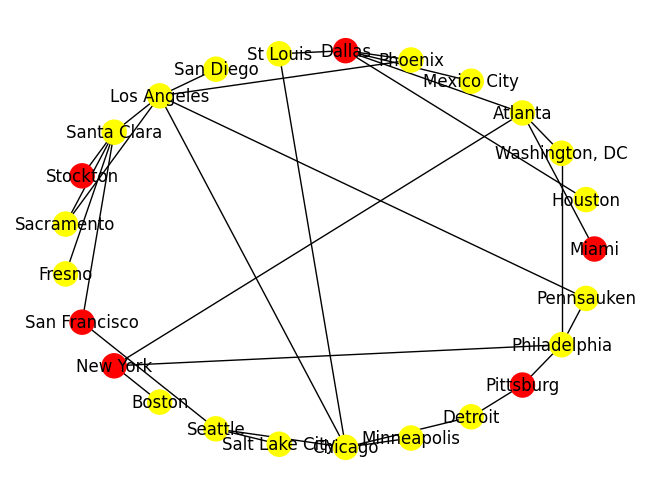

In [14]:
import networkx as nx
from google.colab import drive
import random
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_graph(gmlpath, p):
    G = nx.read_gml(gmlpath)
    secret_num = math.floor(len(G.nodes())*p)
    secretlist = []
    for _ in range(secret_num):
        node = random.choice(list(G.nodes))
        if node not in secretlist:
            secretlist.append(node)
            G.nodes[node]['label'] = 1
    for node in G.nodes():
        if node not in secretlist:
            G.nodes[node]['label'] = 0
    for edge in G.edges():
        if G.nodes[edge[0]]['label']!=G.nodes[edge[1]]['label']:
          G.edges[edge]['weight'] = 1
        else:
          G.edges[edge]['weight'] = 0
    return G, secretlist

def fulldijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        # Early stopping condition
        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            return path[::-1], distances

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    return None, None


def original(graph, start):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    return None, None

# Load the graph from GML file
G1 = nx.read_gml('drive/MyDrive/g2.gml')
# Print the nodes and edges
print(len(G1.nodes()))
print(len(G1.edges()))
#graph initial
p = 0.2 #percent of secret node
gmlpath = 'drive/MyDrive/g2.gml'
graph, secretlist = generate_graph(gmlpath, p)
secretnum = len(secretlist)
#flow initial
# a potential determining param is the original secret flow numbers
flows=[] #original secret flow
paths=[]
secretflownum = math.floor(secretnum*(secretnum-1)*0.3)
for _ in range(secretflownum):
    u, v = random.sample(secretlist, k=2)
    #Todo: potential add depulicate flows
    flows.append([u,v])
    path, distances = fulldijkstra(graph,u,v)
    paths.append(path)
    if(distances[u] != 0):
       print("relabeling")
       #need to relabel
       for step in path:
           if(graph.nodes[step]['label']!=0):
               graph.nodes[step]['label'] = 1
               for neighbor in graph[step]:
                   if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                       graph[step][neighbor]['weight'] = 1
                   else:
                       graph[step][neighbor]['weight'] = 0
#add original secret flows and update the graph
tmpset1 = set(secretlist)
tmpset2 = set(graph.nodes())
tmpset3 = tmpset2 - tmpset1
tmplist3 = list(tmpset3)
m = random.choice(tmplist3) #pick a random public node as the moving mobile node

previous = random.choice(secretlist)

graph.nodes[m]['label'] = 1
for neighbor in graph[m]:
    graph[m][neighbor]['weight'] = 1 - graph.nodes[neighbor]['label']
#find an incremental path
start1 = time.time()
path, distances = fulldijkstra(graph, m, previous)
end1 = time.time()
elapsed1 = end1 - start1
print(f'The program took {elapsed1} seconds to complete')
start2 = time.time()
res1, res2 = original(graph, m)
end2 = time.time()
elapsed2 = end2 - start2
print(f'The program took {elapsed2} seconds to complete')
print(2*elapsed2/elapsed1)
print(path, distances)
for step in path:
    print(step)
    if(graph.nodes[step]['label']!=0):
        graph.nodes[step]['label'] = 1
        for neighbor in graph[step]:
            if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                graph[step][neighbor]['weight'] = 1
            else:
                graph[step][neighbor]['weight'] = 0
drawcolordict=[]
for node in graph.nodes():
    if(graph.nodes[node]['label']==1):
        drawcolordict.append('red')
    else:
        drawcolordict.append('yellow')

nx.draw_circular(graph, with_labels=True, node_color=drawcolordict)
plt.show()


[0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34
 0.36 0.38]
[10.32874584197998, 9.617185592651367, 10.192561149597168, 9.695863723754883, 9.383845329284668, 9.346842765808105, 8.94613265991211, 8.561110496520996, 8.779120445251465, 8.6014986038208, 8.301138877868652, 8.263731002807617, 8.336091041564941, 8.075809478759766, 7.999968528747559, 7.6488494873046875]
[11.374068260192871, 10.78026294708252, 11.424899101257324, 11.363744735717773, 11.1952543258667, 11.321234703063965, 10.968232154846191, 10.85968017578125, 11.112523078918457, 11.153888702392578, 11.063385009765625, 11.113286018371582, 11.054110527038574, 11.088013648986816, 11.13593578338623, 11.205196380615234]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

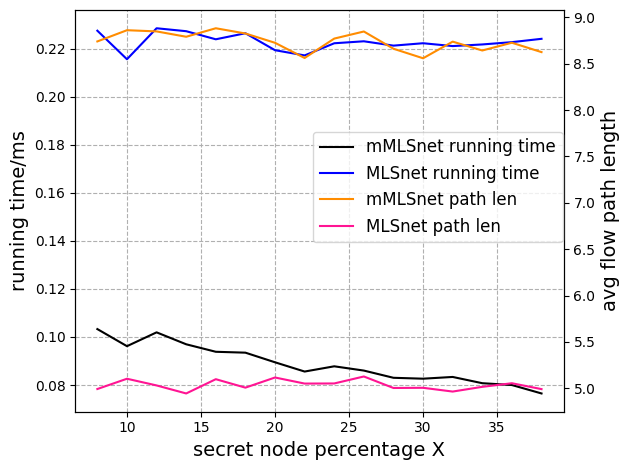

In [30]:
import networkx as nx
import random
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from google.colab import files
import copy
from google.colab import drive

def generate_graph(gmlpath, p):
    G = nx.read_gml(gmlpath)
    nodesssss = len(G.nodes())
    secret_num = math.floor(nodesssss*p)
    secretlist = []
    for _ in range(secret_num):
        node = random.choice(list(G.nodes))
        if node not in secretlist:
            secretlist.append(node)
            G.nodes[node]['label'] = 1
    for node in G.nodes():
        if node not in secretlist:
            G.nodes[node]['label'] = 0
    for edge in G.edges():
        if G.nodes[edge[0]]['label']!=G.nodes[edge[1]]['label']:
          G.edges[edge]['weight'] = 1
        else:
          G.edges[edge]['weight'] = 0
    return G, secretlist

def fulldijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        # Early stopping condition
        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            return path[::-1], distances

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    return None, None


def original(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    c = end
    path = []
    while c is not None:
        path.append(c)
        c = previous_nodes[c]
    return path[::-1], distances, previous_nodes

edgerate = np.arange(0.08, 0.4, 0.02)
searchtime1 = []
searchtime2 = []
sn1 = []
sn2 = []
l1 = []
l2 = []
repeatime = 1000
for rate in edgerate:
    t1 = 0
    t2 = 0
    s1 = 0
    s2 = 0
    l1avg = []
    l2avg = []
    for _ in range(repeatime):
        ll1 = 0
        ll2 = 0
        p = rate
        gmlpath = 'drive/MyDrive/g1.gml'
        graph, secretlist = generate_graph(gmlpath, p)
        secretnum = len(secretlist)
        #flow initial
        # a potential determining param is the original secret flow numbers
        flows=[] #original secret flow
        paths=[]
        secretflownum = math.floor(secretnum*(secretnum-1)*0.3)
        for iter2 in range(secretflownum):
            u, v = random.sample(secretlist, k=2)
            #Todo: potential add depulicate flows
            flows.append([u,v])
            path, distances = fulldijkstra(graph,u,v)
            paths.append(path)
            if(distances[u] != 0):
              print("relabeling")
              #need to relabel
              for step in path:
                  if(graph.nodes[step]['label']!=0):
                      graph.nodes[step]['label'] = 1
                      for neighbor in graph[step]:
                          if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                              graph[step][neighbor]['weight'] = 1
                          else:
                              graph[step][neighbor]['weight'] = 0

        tmpset1 = set(secretlist)
        tmpset2 = set(graph.nodes())
        tmpset3 = tmpset2 - tmpset1
        tmplist3 = list(tmpset3)
        m = random.choice(tmplist3) #pick a random public node as the moving mobile node

        previous = random.choice(secretlist)
        focusflownum = 0
        focuslist = []
        for iter5 in range(secretflownum):
            if(flows[iter5][0] == previous or flows[iter5][1] == previous):
                ll1 = ll1 + len(paths[iter5])
                focusflownum = focusflownum + 1
                if(flows[iter5][0] == previous):
                    anotherfocus = flows[iter5][1]
                else:
                    anotherfocus = flows[iter5][0]
                focuslist.append(anotherfocus)
        graph.nodes[m]['label'] = 1
        for neighbor in graph[m]:
            graph[m][neighbor]['weight'] = 1 - graph.nodes[neighbor]['label']
        #find an incremental path
        start1 = time.time()
        path, distances = fulldijkstra(graph, m, previous)
        end1 = time.time()
        elapsed1 = end1 - start1
        #print(f'The program took {elapsed1} seconds to complete')
        start2 = time.time()
        res1, res2, res3 = original(graph, m, previous)
        end2 = time.time()
        elapsed2 = end2 - start2
        #print(f'The program took {elapsed2} seconds to complete')
        #print(2*elapsed2/elapsed1)
        #print(path, distances)
        t1 = t1 + elapsed1*100
        t2 = t2 + elapsed2*100
        graphc = copy.deepcopy(graph)
        for step in path:
            if(graph.nodes[step]['label']!=0):
                graph.nodes[step]['label'] = 1
                for neighbor in graph[step]:
                    if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                        graph[step][neighbor]['weight'] = 1
                    else:
                        graph[step][neighbor]['weight'] = 0
        ll1 = ll1 + (len(path)-1)*focusflownum
        rvpath = path[::-1]
        for focusnode in focuslist:
            if focusnode in rvpath:
                del_cnt = 2*rvpath.index(focusnode)
                ll1 = ll1 - del_cnt
        for node in graph.nodes():
            s1 = s1 + graph.nodes[node]['label'] 
        for step in res1:
            if(graphc.nodes[step]['label']!=0):
                graphc.nodes[step]['label'] = 1
                for neighbor in graphc[step]:
                    if graphc.nodes[step]['label']!=graphc.nodes[neighbor]['label']:
                        graphc[step][neighbor]['weight'] = 1
                    else:
                        graphc[step][neighbor]['weight'] = 0
        for node in graphc.nodes():
            s2 = s2 + graphc.nodes[node]['label']

        #ll2 calculation
        for focusnode in focuslist:
            c = focusnode
            newpath = []
            while c is not None:
                newpath.append(c)
                c = res3[c]
            ll2 = ll2 + len(newpath)
        if focusflownum != 0:
            ll1 = ll1/focusflownum
            ll2 = ll2/len(focuslist)
            l1avg.append(ll1)
            l2avg.append(ll2)
    searchtime1.append(t1)
    searchtime2.append(t2)
    sn1.append(s1)
    sn2.append(s2)
    l1.append(np.average(l1avg))
    l2.append(np.average(l2avg))
print(edgerate)
print(searchtime1)
print(searchtime2)
edge1 = 100*np.array(edgerate)
time1 = np.array(searchtime1)
time2 = np.array(searchtime2)
secret_node_num1 = np.array(sn1)
secret_node_num2 = np.array(sn2)
avgpathlen1 = np.array(l1)
avgpathlen2 = np.array(l2)

fig, ax1 = plt.subplots()
line1, = ax1.plot(edge1, 1000*0.01*time1/repeatime, label='mMLSnet running time',color='black')
line2, = ax1.plot(edge1, 1000*0.02*time2/repeatime, label='MLSnet running time',color='blue')  #the double come from the two rounds of MLSnet algorithms
ax1.set_ylabel('running time/ms', fontsize=14)  # set y-axis label
ax1.set_xlabel("secret node percentage X", fontsize=14)
ax1.grid(linestyle='--')

ax2 = ax1.twinx()
line3, = ax2.plot(edge1, avgpathlen1, label='mMLSnet path len', color='darkorange')
line4, = ax2.plot(edge1, avgpathlen2, label='MLSnet path len', color='deeppink')
#line5, = ax2.plot(edgerate, secret_node_num1 - secret_node_num2, color='red')
ax2.set_ylabel('avg flow path length', fontsize=14)  # set y-axis label
fig.legend(handles=[line1, line2, line3, line4], loc='center right', bbox_to_anchor=(0.4, 0.35, 0.5, 0.5), fontsize = 12)
fig.tight_layout()
plt.savefig("zoo.eps")
files.download("zoo.eps") 
